**MACHINE LEARNING**

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.metrics import r2_score
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("/Users/santiagoromano/Documents/MIM.NET/Mim.NET/data/train.csv")
test_df = pd.read_csv("/Users/santiagoromano/Documents/MIM.NET/Mim.NET/data/test.csv")
store_df = pd.read_csv("/Users/santiagoromano/Documents/MIM.NET/Mim.NET/data/store.csv")

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_11107/435312460.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/Users/santiagoromano/Documents/MIM.NET/Mim.NET/data/train.csv")


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
train_df = pd.merge(train_df,store_df,how="inner",on="Store")
test_df = pd.merge(test_df,store_df,how="inner",on="Store")

In [15]:
train_df[train_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


# Data Engineering

##Train / Store sets

In [17]:
train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [18]:
# Replace the NaN values in "CompetitionDistance" with the mean.
train_df["CompetitionDistance"].replace(np.nan,train_df["CompetitionDistance"].mean(),inplace=True)
# All NaN values in the train dataset are transformed into 0.
train_df.fillna(0,inplace=True)

In [19]:

train_df['Date'] = pd.to_datetime(train_df['Date'])

In [20]:
# Extracting date parts and adding them as separate columns
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek
train_df['DayOfYear'] = train_df['Date'].dt.dayofyear
train_df['Week'] = train_df['Date'].dt.week
train_df['WeekOfYear'] = train_df['Date'].dt.weekofyear
train_df['Quarter'] = train_df['Date'].dt.quarter

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_11107/2592900592.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['Week'] = train_df['Date'].dt.week
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_11107/2592900592.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['WeekOfYear'] = train_df['Date'].dt.weekofyear


In [21]:
train_df["StateHoliday"].replace("0",0,inplace=True)

In [22]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,2.998341,1.997391,0.0,1.0,3.0,5.0,6.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,5430.085652,7705.297659,20.0,710.0,2330.0,6880.0,75860.0
CompetitionOpenSinceMonth,1017209.0,4.926878,4.283543,0.0,0.0,4.0,9.0,12.0
CompetitionOpenSinceYear,1017209.0,1370.172511,935.363448,0.0,0.0,2006.0,2011.0,2015.0


In [24]:
# Se reemplaza por su significado
train_df["StateHoliday"] = train_df["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [25]:
# Se reemplaza por su significado
train_df["StoreType"] = train_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [26]:
# Se reemplaza por su significado
train_df["Assortment"] = train_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [28]:
# Se reemplaza por su significado
train_df["PromoInterval"] = train_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [29]:
# se aplica one-hot-encoding
StateHoliday_dumm = pd.get_dummies(train_df["StateHoliday"])
train_df =pd.concat([train_df,StateHoliday_dumm],axis=1)
train_df.drop("StateHoliday",axis=1,inplace=True)

In [30]:
StoreType_dumm = pd.get_dummies(train_df["StoreType"])
train_df =pd.concat([train_df,StoreType_dumm],axis=1)
train_df.drop("StoreType",axis=1,inplace=True)

In [31]:
Assortment_dumm = pd.get_dummies(train_df["Assortment"])
train_df =pd.concat([train_df,Assortment_dumm],axis=1)
train_df.drop("Assortment",axis=1,inplace=True)

In [32]:
PromoInterval_dumm = pd.get_dummies(train_df["PromoInterval"])
train_df =pd.concat([train_df,PromoInterval_dumm],axis=1)
train_df.drop("PromoInterval",axis=1,inplace=True)

In [33]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
0,1,4,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
1,1,3,2015-07-30,5020,546,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
2,1,2,2015-07-29,4782,523,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
3,1,1,2015-07-28,5011,560,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
4,1,0,2015-07-27,6102,612,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1


In [34]:
# se analiza la correlación
train_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
Store,1.000000,-8.483588e-06,0.005126,0.024325,-0.000047,5.786226e-05,0.000641,-0.026394,-0.032893,-0.008794,...,0.001412,0.060986,-0.051492,-0.006140,0.002661,0.019328,8.035330e-03,0.012181,-0.013087,-0.008488
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.386445,-0.528963,-3.929253e-01,-0.205388,-0.000025,0.000008,0.000007,...,-0.000019,-0.000039,0.000071,0.000052,-0.000051,-0.000007,-3.017220e-07,0.000198,-0.000019,-0.000168
Sales,0.005126,-4.621250e-01,1.000000,0.894711,0.678472,4.523447e-01,0.085124,-0.019210,-0.012431,0.002749,...,0.139940,-0.005140,-0.022854,-0.080494,0.068772,0.065473,-4.366787e-02,-0.034946,-0.053267,0.091040
Customers,0.024325,-3.864447e-01,0.894711,1.000000,0.616768,3.161695e-01,0.071568,-0.102780,-0.015188,0.000489,...,0.366726,0.034059,-0.189039,-0.031864,-0.017859,0.275905,-6.547287e-02,-0.078401,-0.063053,0.150159
Open,-0.000047,-5.289625e-01,0.678472,0.616768,1.000000,2.950423e-01,0.086171,0.007981,-0.000200,-0.001144,...,0.051233,-0.004709,-0.005538,-0.006438,-0.000522,0.038631,-3.608057e-03,-0.005269,-0.002074,0.008309
Promo,0.000058,-3.929253e-01,0.452345,0.316169,0.295042,1.000000e+00,0.067483,0.000138,-0.000039,-0.000034,...,0.000108,0.000223,-0.000414,-0.000296,0.000290,0.000039,-6.029887e-07,-0.001154,0.000107,0.000983
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.071568,0.086171,6.748281e-02,1.000000,-0.003684,-0.001688,-0.001801,...,0.001825,0.001557,-0.000899,0.002464,-0.002576,0.000608,-2.109399e-03,-0.004427,-0.002624,0.006909
CompetitionDistance,-0.026394,-2.458113e-05,-0.019210,-0.102780,0.007981,1.380672e-04,-0.003684,1.000000,-0.034400,-0.002894,...,-0.071210,-0.097901,0.131616,-0.141214,0.150360,-0.049883,-5.064480e-02,-0.082631,-0.054952,0.139704
CompetitionOpenSinceMonth,-0.032893,8.338445e-06,-0.012431,-0.015188,-0.000200,-3.919081e-05,-0.001688,-0.034400,1.000000,0.784968,...,-0.039814,0.015645,-0.041428,0.100431,-0.091268,-0.051397,-1.794370e-02,-0.056377,-0.031330,0.081027
CompetitionOpenSinceYear,-0.008794,6.677520e-06,0.002749,0.000489,-0.001144,-3.429440e-05,-0.001801,-0.002894,0.784968,1.000000,...,-0.039637,0.034669,-0.078003,0.127335,-0.115449,-0.066661,-6.843751e-02,-0.010996,-0.073972,0.097433


In [35]:
train_df.corr()["Sales"]

Store                        0.005126
DayOfWeek                   -0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionDistance         -0.019210
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
Promo2SinceYear             -0.091056
Year                         0.023519
Month                        0.048768
Day                         -0.011612
DayOfYear                    0.047503
Week                         0.052946
WeekOfYear                   0.052946
Quarter                      0.043984
Christmas                   -0.092618
Easter holiday              -0.117497
No Holiday                   0.254216
Public Holiday              -0.203028
Type A                      -0.010076
Type B                       0.139940
Type C      

In [37]:
(train_df['CompetitionOpenSinceYear'] == 0).sum()

323348

In [38]:
value_counts_table = train_df['CompetitionOpenSinceYear'].value_counts().to_frame().reset_index()
value_counts_table.columns = ['CompetitionOpenSinceYear', 'Count']
print(value_counts_table)

    CompetitionOpenSinceYear   Count
0                        0.0  323348
1                     2013.0   75426
2                     2012.0   74299
3                     2014.0   63732
4                     2005.0   56564
5                     2010.0   51258
6                     2011.0   49396
7                     2009.0   49396
8                     2008.0   48476
9                     2007.0   43744
10                    2006.0   42802
11                    2015.0   35060
12                    2002.0   24882
13                    2004.0   19804
14                    2003.0   16794
15                    2001.0   14704
16                    2000.0    9236
17                    1999.0    7352
18                    1990.0    4710
19                    1994.0    1884
20                    1995.0    1700
21                    1961.0     942
22                    1998.0     942
23                    1900.0     758


In [39]:
# se agregan nuevos atributos en relación a la antiguedad
train_df['CompetitionOpen'] = 12 * (train_df.Year - train_df.CompetitionOpenSinceYear) + (train_df.Month - train_df.CompetitionOpenSinceMonth)

In [40]:
train_df.loc[train_df['CompetitionOpenSinceYear'] == 0, 'CompetitionOpen'] = 0

In [41]:
train_df['CompetitionOpen'] = train_df.CompetitionOpen.apply(lambda x: x if x > 0 else 0)

In [42]:
train_df['PromoOpen'] = 12 * (train_df.Year - train_df.Promo2SinceYear) + (train_df.WeekOfYear - train_df.Promo2SinceWeek) / 4.0

In [43]:
train_df.loc[train_df['Promo2SinceYear'] == 0, 'PromoOpen'] = 0

In [44]:
train_df['PromoOpen'] = train_df.PromoOpen.apply(lambda x: x if x > 0 else 0)

In [45]:
open_values = train_df.loc[train_df['Sales'] == 0, 'Open']
print(open_values)

5          0
12         0
19         0
26         0
33         0
          ..
1017182    0
1017189    0
1017196    0
1017203    0
1017208    0
Name: Open, Length: 172871, dtype: int64


In [46]:
# se filtran los casos donde 'Sales' es igual a 0 y 'Open' es diferente de 0
filtered_data = train_df.loc[(train_df['Sales'] == 0) & (train_df['Open'] == 1)]
print(filtered_data)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
22589       25          3 2014-02-13      0          0     1      0   
22590       25          2 2014-02-12      0          0     1      0   
25212       28          3 2014-09-04      0          0     1      1   
25213       28          2 2014-09-03      0          0     1      1   
25214       28          1 2014-09-02      0          0     1      1   
51491       57          1 2014-07-01      0          0     1      1   
92570      102          3 2014-07-24      0          0     1      0   
92582      102          5 2014-07-12      0          0     1      0   
205303     227          3 2014-09-11      0          0     1      0   
210424     232          3 2013-01-24      0          0     1      1   
215530     238          3 2014-07-24      0          0     1      0   
235476     259          3 2013-02-07      0          0     1      1   
274736     303          3 2014-07-24      0          0     1      0   
297110

In [47]:
len(train_df)

1017209

In [48]:
# se consideran solo las stores open
train_df = train_df[train_df["Open"] != 0]
# se consideran solo los registros con ventas mayores a 0. Simplifica el cálculo de rmspe
train_df = train_df[train_df["Sales"] > 0]

In [49]:
len(train_df)

844338

##Test Set

In [50]:
test_df["CompetitionDistance"].replace(np.nan,test_df["CompetitionDistance"].mean(),inplace=True)
test_df.fillna(0,inplace=True)

In [51]:
test_df["Date"] = pd.to_datetime(test_df["Date"])

In [52]:
test_df['WeekOfYear'] = test_df.Date.dt.weekofyear

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_11107/1463333893.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['WeekOfYear'] = test_df.Date.dt.weekofyear


In [ ]:
#test_df = add_datepart(test_df, 'Date' , drop=False)

In [53]:
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['DayOfWeek'] = test_df['Date'].dt.dayofweek
test_df['DayOfYear'] = test_df['Date'].dt.dayofyear
test_df['Week'] = test_df['Date'].dt.week
test_df['Quarter'] = test_df['Date'].dt.quarter

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_11107/46101704.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['Week'] = test_df['Date'].dt.week


In [54]:
test_df["StateHoliday"].replace("0",0,inplace=True)

In [55]:
test_df["StateHoliday"] = test_df["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [56]:
test_df["StoreType"] = test_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [57]:
test_df["Assortment"] = test_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [58]:
test_df["PromoInterval"] = test_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [59]:
StateHoliday_dumm = pd.get_dummies(test_df["StateHoliday"])
test_df =pd.concat([test_df,StateHoliday_dumm],axis=1)
test_df.drop("StateHoliday",axis=1,inplace=True)

In [60]:
StoreType_dumm = pd.get_dummies(test_df["StoreType"])
test_df =pd.concat([test_df,StoreType_dumm],axis=1)
test_df.drop("StoreType",axis=1,inplace=True)

In [61]:
Assortment_dumm = pd.get_dummies(test_df["Assortment"])
test_df =pd.concat([test_df,Assortment_dumm],axis=1)
test_df.drop("Assortment",axis=1,inplace=True)

In [62]:
PromoInterval_dumm = pd.get_dummies(test_df["PromoInterval"])
test_df =pd.concat([test_df,PromoInterval_dumm],axis=1)
test_df.drop("PromoInterval",axis=1,inplace=True)

In [63]:
test_df['CompetitionOpen'] = 12 * (test_df.Year - test_df.CompetitionOpenSinceYear) + (test_df.Month - test_df.CompetitionOpenSinceMonth)
test_df['CompetitionOpen'] = test_df.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
test_df['PromoOpen'] = 12 * (test_df.Year - test_df.Promo2SinceYear) + (test_df.WeekOfYear - test_df.Promo2SinceWeek) / 4.0
test_df['PromoOpen'] = test_df.PromoOpen.apply(lambda x: x if x > 0 else 0)

In [64]:
test_df.loc[test_df['CompetitionOpenSinceYear'] == 0, 'CompetitionOpen'] = 0
test_df.loc[test_df['Promo2SinceYear'] == 0, 'PromoOpen'] = 0

In [65]:
ids = test_df["Id"]
test_df.drop("Id",axis=1,inplace=True)

In [66]:
# se agregan las columnas faltantes en el conjunto de test
test_df["Christmas"] = 0
test_df["Easter holiday"] = 0

In [67]:
test_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'WeekOfYear', 'Year', 'Month', 'Day', 'DayOfYear',
       'Week', 'Quarter', 'No Holiday', 'Public Holiday', 'Type A', 'Type B',
       'Type C', 'Type D', 'Basic', 'Extended', 'Extra', 'From Feb to Nov',
       'From Jan to Oct', 'From Mar to Dec', 'No PromoInterval',
       'CompetitionOpen', 'PromoOpen', 'Christmas', 'Easter holiday'],
      dtype='object')

# Separación Test / Train

In [68]:
X = train_df.drop('Sales', axis=1)
Y = train_df['Sales']

In [69]:
# se define el conjunto de validación dentro de train_df
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2 ,  random_state=42)

In [71]:
X_train = X_train.drop(['Date', 'Customers'],axis=1)
X_test = X_test.drop(['Date', 'Customers'],axis=1)

In [72]:
# se obtiene el orden de columnas de X_train
column_order = X_train.columns

# se reordenan las columnas de test_df según el orden de column_order
test_df = test_df[column_order]

In [73]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'DayOfYear', 'Week',
       'WeekOfYear', 'Quarter', 'Christmas', 'Easter holiday', 'No Holiday',
       'Public Holiday', 'Type A', 'Type B', 'Type C', 'Type D', 'Basic',
       'Extended', 'Extra', 'From Feb to Nov', 'From Jan to Oct',
       'From Mar to Dec', 'No PromoInterval', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

In [74]:
test_df.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'DayOfYear', 'Week',
       'WeekOfYear', 'Quarter', 'Christmas', 'Easter holiday', 'No Holiday',
       'Public Holiday', 'Type A', 'Type B', 'Type C', 'Type D', 'Basic',
       'Extended', 'Extra', 'From Feb to Nov', 'From Jan to Oct',
       'From Mar to Dec', 'No PromoInterval', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

#Entrenamiento y predicción

In [75]:
# Se define la metrica
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

##Modelos out of the box

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def evaluate_models(models, model_names, X_train, y_train, X_test, y_test, rmspe):
    MSE=[]
    r_2=[]
    accuracy = []
    RMSE = []
    RMSPE=[]
    d={}
    for model in models:
        model.fit(X_train,y_train)
        y_pre=model.predict(X_test)
        MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
        r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
        accuracy.append((model.score(X_test,y_test))*100)
        RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
        RMSPE.append(rmspe(y_test,y_pre))
    d=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"Accuracy":accuracy,"RMSE":RMSE,"RMSPE":RMSPE})
    return d

In [86]:
models=[LinearRegression(),xgb.XGBRegressor(n_jobs=-1),RandomForestRegressor(n_jobs=-1),GradientBoostingRegressor()]
model_names=['LinearRegression', 'XGBRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']
results = evaluate_models(models, model_names, X_train, y_train, X_test, y_test, rmspe)

In [87]:
results

,Modelling Name,MSE,R_2,Accuracy,RMSE,RMSPE
0,LinearRegression,7.505380e+06,0.224896,22.489625,2739.594939,0.495716
1,XGBRegressor,1.239566e+06,0.871986,87.198620,1113.357971,0.205585
2,RandomForestRegressor,8.335168e+05,0.913920,91.392015,912.971430,0.149255
3,GradientBoostingRegressor,5.545725e+06,0.427276,42.727589,2354.936332,0.449940


## Random search XGBOOST

In [ ]:
# se obtiene el 30% de los datos de entrenamiento más recientes para realizar la busqueda de hiperparámetros
# y se validan los resultados en nuestro conjunto de valdiación

# se calcula el índice para obtener el 30%
#index = int(len(X_train) * 0.3)

# se obtiene el 30% de los registros en X_train y y_train
#X_train_last30 = X_train.iloc[:index]
#y_train_last30 = y_train.iloc[:index]

In [88]:
def tune_and_fit_model(model, param_dist, X_train, y_train, X_test, scorer, n_iter=1, cv=5, random_state=42):
    # Perform randomized search for best hyperparameters
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring=scorer,
        cv=cv,
        random_state=random_state
    )
    random_search.fit(X_train, y_train)

    # Print the best parameters found
    print("Best parameters found:")
    print(random_search.best_params_)

    # Fit the model with the best parameters to the training data
    best_model = random_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    return best_model, y_pred

In [89]:
rf = RandomForestRegressor(n_jobs=4)
scorer = make_scorer(rmspe, greater_is_better=False)
param_dist = {
    'n_estimators': range(100, 1100, 100),
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': np.linspace(.0001, .01, 100),
    'max_features': range(2, X_train.shape[1])
}
best_model_rf, y_pred = tune_and_fit_model(rf, param_dist, X_train, y_train, X_test, scorer)

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [78]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# se definen los parámetros que deseas buscar
param_dist = {
    'max_depth': sp_randint(1, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': sp_randint(100, 1000),
    'seed': [42]
}

# se crea un objeto DMatrix para los datos de entrenamiento
#dtrain = xgb.DMatrix(X_train_last30, y_train_last30)
dtrain = xgb.DMatrix(X_train, y_train)

# se crea el regresor XGBoost
xgb_model = xgb.XGBRegressor(n_jobs=-1)

# se crea un objeto RandomizedSearchCV y de utiliza como score la metrica a optimizar
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=1, scoring=make_scorer(rmspe, greater_is_better=False), cv=5, random_state=42)

# se ejecuta la búsqueda aleatoria de hiperparámetros
#random_search.fit(X_train_last30, y_train_last30)
random_search.fit(X_train, y_train)

# se muestra los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# se entrena un modelo final con los mejores parámetros encontrados
best_model = random_search.best_estimator_

# se utiliza la totalidad de los registros de entrenamiento
best_model.fit(X_train, y_train)

# se realiza predicciones en nuestro conjunto de valdiación
y_pred = best_model.predict(X_test)


Mejores parámetros encontrados:
{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'seed': 42, 'subsample': 1.0}


In [80]:
model = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 8, n_estimators= 591, seed= 42, subsample= 0.7)
model.fit(X_train, y_train)

# Realiza predicciones en nuestro conjunto de valdiación
y_pred = model.predict(X_test)

In [81]:
# se obtiene el resultado de la métrica para el modelo con hiperparámetros optimizados
print('rmspe: ', rmspe(y_test, y_pred))

rmspe:  0.1323161696667477


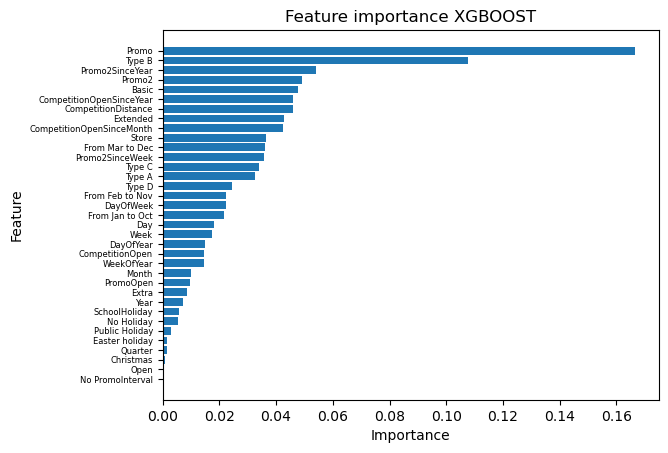

In [82]:
# Feature importance XGBOOST
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=True)

# se ajustar el tamaño de las etiquetas
plt.tick_params(axis='y', labelsize=6)

plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance XGBOOST')
plt.show()

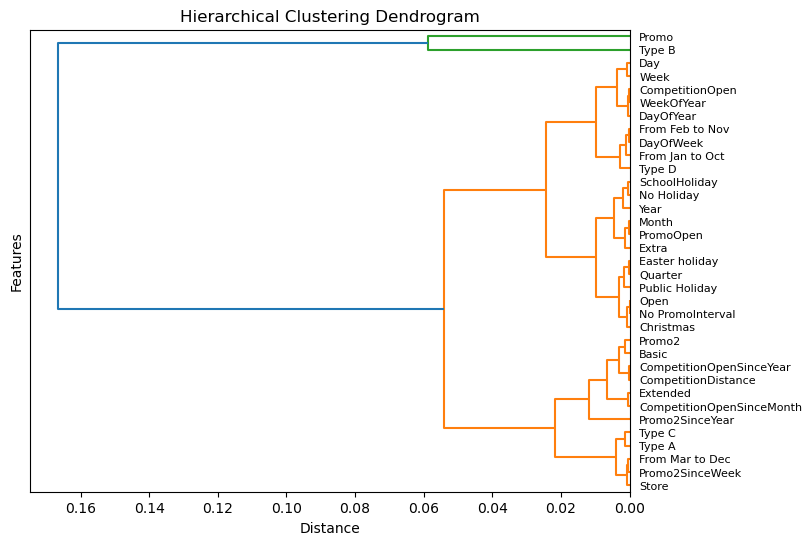

In [83]:
# Se crea una matriz de enlace jerárquico utilizando el método de enlace completo (complete linkage)
linkage_matrix = sch.linkage(feature_importances['importance'].values.reshape(-1, 1), method='complete')

# Se genera el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=feature_importances.index, orientation='left', distance_sort=True)

plt.ylabel('Features')
plt.xlabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Ajustar las posiciones de las etiquetas
plt.subplots_adjust(left=0.3, right=0.9)

plt.show()

##Random search para Random Forest





In [ ]:
#param_dist = {'max_depth':(4,6,8,10,12,14,16,20),
#         'n_estimators':(4,8,16,24,48,72,96,128),
#         'min_samples_split':(2,4,6,8,10)}
param_dist = {
    'n_estimators': range(100, 1100, 100),
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': np.linspace(.0001, .01, 100),
    'max_features': range(2, X_train.shape[1])
}

# se crea el modelo Random Forest Regressor
rf = RandomForestRegressor(n_jobs=4)

# se define la función de pérdida para la búsqueda aleatoria
scorer = make_scorer(rmspe, greater_is_better=False)

# se realiza la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,  # Número de combinaciones de hiperparámetros a probar
    scoring=scorer,
    cv=5,  # Número de divisiones de validación cruzada
    random_state=42
)

# se ejecuta la búsqueda aleatoria de hiperparámetros
random_search.fit(X_train, y_train)

# se muestra los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# se entrena un modelo final con los mejores parámetros encontrados
best_model_rf = random_search.best_estimator_
best_model_rf.fit(X_train, y_train)

# se realizan las predicciones en nuestro conjunto de validación
y_pred = best_model_rf.predict(X_test)


In [ ]:
#model=RandomForestRegressor()
#    n_estimators=128,
#                             max_depth=20,
#                             min_samples_split=16,
#                             min_samples_leaf=1,
#                             n_jobs=4,
#                             warm_start=False)
#model.fit(X_train,y_train)

# se realizan las predicciones en nuestro conjunto de validación
#y_pred = model.predict(X_test)

In [ ]:
# se obtiene el resultado de la métrica para el modelo con hiperparámetros optimizados
print('rmspe: ', rmspe(y_test, y_pred))

rmspe:  0.3409795490014296


In [ ]:
# Feature importance Random Forest
feature_importances = pd.DataFrame(best_model_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=True)

# se ajusta el tamaño de las etiquetas
plt.tick_params(axis='y', labelsize=6)

plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance Random Forest')
plt.show()

## Predicciones finales

In [ ]:
#model = RandomForestRegressor(n_estimators=128, max_depth=20, min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=4, random_state=35, verbose=0, warm_start=False)
#model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=10,
                      n_estimators=128, n_jobs=4, random_state=35)

In [ ]:
# Se utiliza el modelo con mejor resultado:
#best_model
#best_model_rf

#y_pred = best_model_rf.predict(test_df)
#y_pred = best_model.predict(test_df)
#y_pred = model.predict(test_df)
y_pred = model.predict(test_df_xgb)



In [ ]:
Prediction = pd.DataFrame({"Id":ids,"Sales":y_pred})

In [ ]:
Prediction.to_csv("submission3.csv",index=False)